## This script contains the following:
### 1. Import libraries and data
### 2. Data prep
### 3. The elbow technique
### 4. K-means clustering
#### 1. Visualizations
#### 2. Descriptive statistics and insights

## Import Libraries and Data

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Importing the k-means algorithm from scikit-learn
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib

In [2]:
# This option ensures the graphs we create are displayed in our notebook without the need to "call" them specifically
%matplotlib inline

In [3]:
# Creating Path
path = r'C:\Users\anush\Zomato Banglore Restaurants'

In [4]:
# Importing zomato_cleaned.pkl File
df = pd.read_pickle(os.path.join(path, '02 Data' , 'Prepared Data' , 'zomato_cleaned.pkl'))

## Data Prep

In [5]:
# Inspect the data
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   url                          51717 non-null  object  
 1   address                      51717 non-null  object  
 2   name                         51717 non-null  object  
 3   online_order                 51717 non-null  category
 4   book_table                   51717 non-null  category
 5   rate                         51717 non-null  object  
 6   votes                        51717 non-null  int32   
 7   phone                        51717 non-null  object  
 8   location                     51717 non-null  category
 9   rest_type                    51717 non-null  category
 10  dish_liked                   51717 non-null  object  
 11  cuisines                     51717 non-null  object  
 12  approx_cost(for two people)  51717 non-null  object  
 13  r

In [6]:
# Replace non-numeric values ('Not Available') with NaN
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].replace('Not Available', None)

# Remove commas and convert to float
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').astype(float)

# Convert the 'rate' column to numeric, handling non-numeric values
df['rate'] = df['rate'].str.split('/').str[0]
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Check for successful conversion
print(df[['approx_cost(for two people)', 'rate', 'votes']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   approx_cost(for two people)  51371 non-null  float64
 1   rate                         41665 non-null  float64
 2   votes                        51717 non-null  int32  
dtypes: float64(2), int32(1)
memory usage: 1010.2 KB
None


In [7]:
# Removing Unnecessary Columns
df.drop(columns=['url', 'address', 'name', 'online_order', 'book_table', 'phone', 'location', 'rest_type', 'dish_liked', 
                 'cuisines', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'], inplace=True)

In [8]:
# Checking for Missing Values
df.isnull().sum()

rate                           10052
votes                              0
approx_cost(for two people)      346
dtype: int64

In [9]:
# Drop rows with missing values in the specified critical columns
df_cleaned = df.dropna(subset=[
    'rate', 
    'approx_cost(for two people)'
])

# Checking the shape after dropping rows with missing values
print(df_cleaned.shape)

(41418, 3)


In [10]:
# Checking for Missing Values Again
df_cleaned.isnull().sum()

rate                           0
votes                          0
approx_cost(for two people)    0
dtype: int64

## The Elbow Technique

In [11]:
# Defining the range of potential clusters
num_cl = range(1, 10)  # Clustering from 1 to 9 clusters
kmeans = [KMeans(n_clusters=i, random_state=0) for i in num_cl]  # Creating KMeans models for each cluster

In [12]:
# Creating a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df_cleaned).score(df_cleaned) for i in range(len(kmeans))] 

score

[-41199819378.4829,
 -20898462407.10221,
 -13441683734.126436,
 -9231580617.562122,
 -7664603768.396723,
 -5955316154.941128,
 -5316622840.802488,
 -4620254382.667168,
 -3475203767.66963]

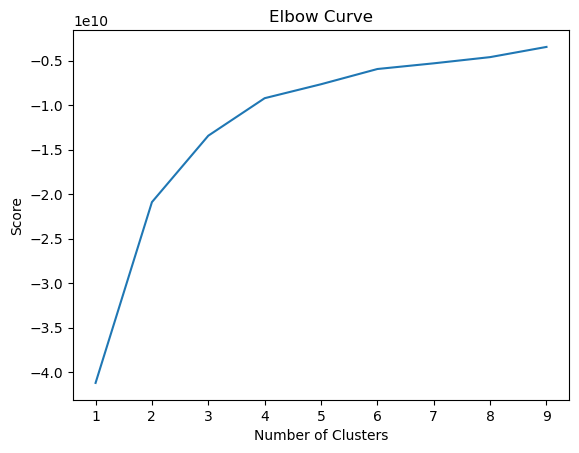

In [13]:
# Ploting the elbow curve using PyLab
pl.plot(num_cl, score)  # Plot the number of clusters (x-axis) against the score (y-axis)
pl.xlabel('Number of Clusters')  # Label for x-axis
pl.ylabel('Score')  # Label for y-axis
pl.title('Elbow Curve')  # Title of the plot
pl.show()  # Display the plot

I would recommend using **4 or 5 clusters** because they better balance model simplicity and the ability to capture distinct patterns in the data. If we aim for a slightly more granular segmentation, **5 clusters** would be ideal. If simplicity is prioritized, **4 clusters** could also be a reasonable choice.

## k-means Clustering

In [14]:
# Creating the k-means object
kmeans = KMeans(n_clusters = 4)

In [15]:
# Fit the k-means object to the data
kmeans.fit(df_cleaned)

KMeans(n_clusters=4)

In [16]:
# Assign the cluster labels to each data point in the dataset by applying the k-means model
# The 'clusters' column will contain the cluster ID (e.g., 0, 1, 2, etc.) for each row based on its features
df_cleaned['clusters'] = kmeans.fit_predict(df_cleaned)

C:\Users\anush\AppData\Local\Temp\ipykernel_11272\1465206490.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['clusters'] = kmeans.fit_predict(df_cleaned)


In [17]:
df_cleaned.head()

rate  votes  approx_cost(for two people)  clusters
0   4.1    775                        800.0         1
1   4.1    787                        800.0         1
2   3.8    918                        800.0         1
3   3.7     88                        300.0         0
4   3.8    166                        600.0         0

In [18]:
df_cleaned['clusters'].value_counts()

clusters
0    33262
1     6046
2     1907
3      203
Name: count, dtype: int64

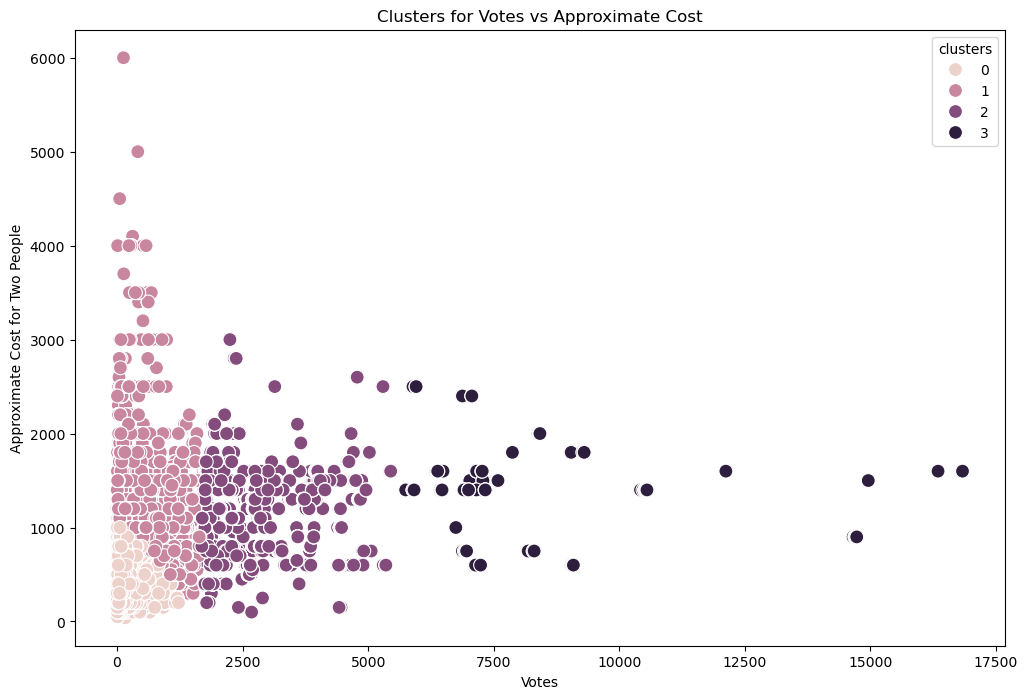

In [21]:
# Plot the clusters for the 'votes' and 'approx_cost(for two people)' variables
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=df_cleaned['votes'], 
    y=df_cleaned['approx_cost(for two people)'], 
    hue=df_cleaned['clusters'], 
    s=100
) 
# `x` and `y` represent the variables of interest. `hue` represents the cluster labels.
# `s` determines the size of the scatterplot points.

ax.grid(False)  # This removes the grid from the background.
plt.xlabel('Votes')  # Label x-axis.
plt.ylabel('Approximate Cost for Two People')  # Label y-axis.
plt.title('Clusters for Votes vs Approximate Cost')  # Add a title to the plot.
plt.show()

The scatter plot of votes versus approximate cost reveals meaningful clusters but with room for refinement. Cluster 0 (light pink) groups low-cost restaurants with fewer votes, while Cluster 1 (pink) expands to mid-range costs and votes. Clusters 2 (purple) and 3 (dark purple) represent higher-cost restaurants with more votes, reflecting premium establishments. A positive trend between cost and votes is evident, though some high-cost, low-vote outliers exist. Overlap between Clusters 1 and 2 suggests the need for additional features like location or ratings to improve cluster distinctiveness. Further investigation of outliers and adjustments to clustering parameters could enhance segmentation accuracy.

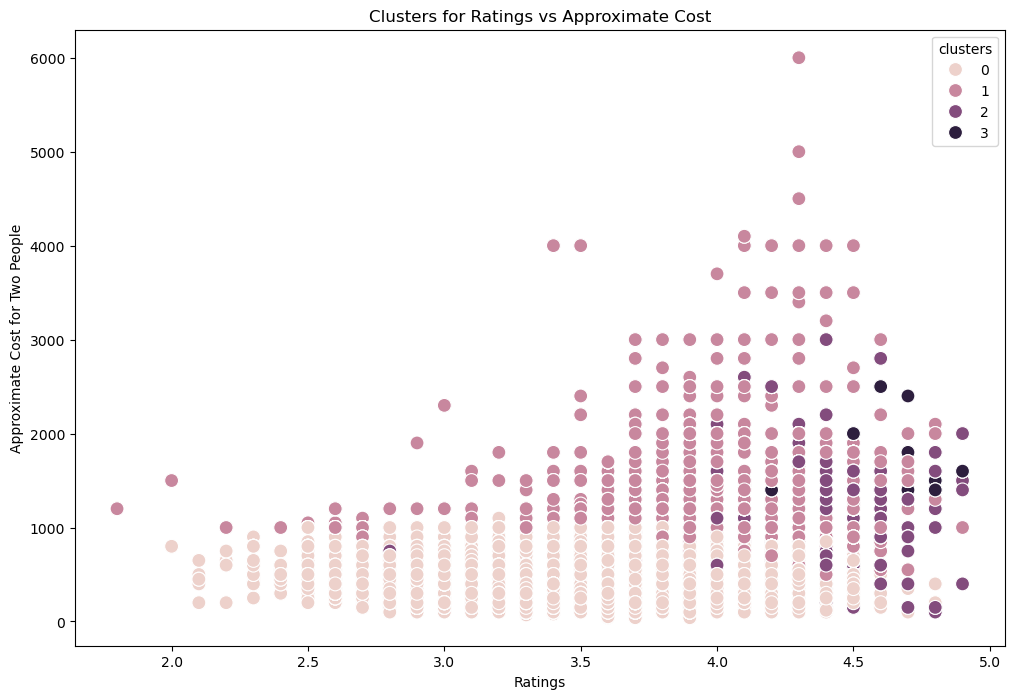

In [22]:
# Plot the clusters for the 'rate' and 'approx_cost(for two people)' variables
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=df_cleaned['rate'], 
    y=df_cleaned['approx_cost(for two people)'], 
    hue=df_cleaned['clusters'], 
    s=100
) 
# `x` and `y` represent the variables of interest. `hue` represents the cluster labels.
# `s` determines the size of the scatterplot points.

ax.grid(False)  # This removes the grid from the background.
plt.xlabel('Ratings')  # Label x-axis.
plt.ylabel('Approximate Cost for Two People')  # Label y-axis.
plt.title('Clusters for Ratings vs Approximate Cost')  # Add a title to the plot.
plt.show()

The clusters align well with expectations: Cluster 0 (light pink) represents low-cost, low-rated restaurants; Cluster 1 (pink) captures mid-cost, mid-rated establishments; and Clusters 2 (purple) and 3 (dark purple) represent high-cost, highly-rated restaurants. Higher costs generally correlate with better ratings, reflecting the association between price and quality. However, overlaps between Clusters 1 and 2 in mid-cost ranges and sparse representation in the high-cost range suggest potential areas for refinement. Outliers with high costs and low ratings in Clusters 0 and 1 indicate anomalies worth investigating. To improve clustering, incorporating variables like votes, cuisine type, or location and revisiting clustering parameters could enhance segmentation and insights.

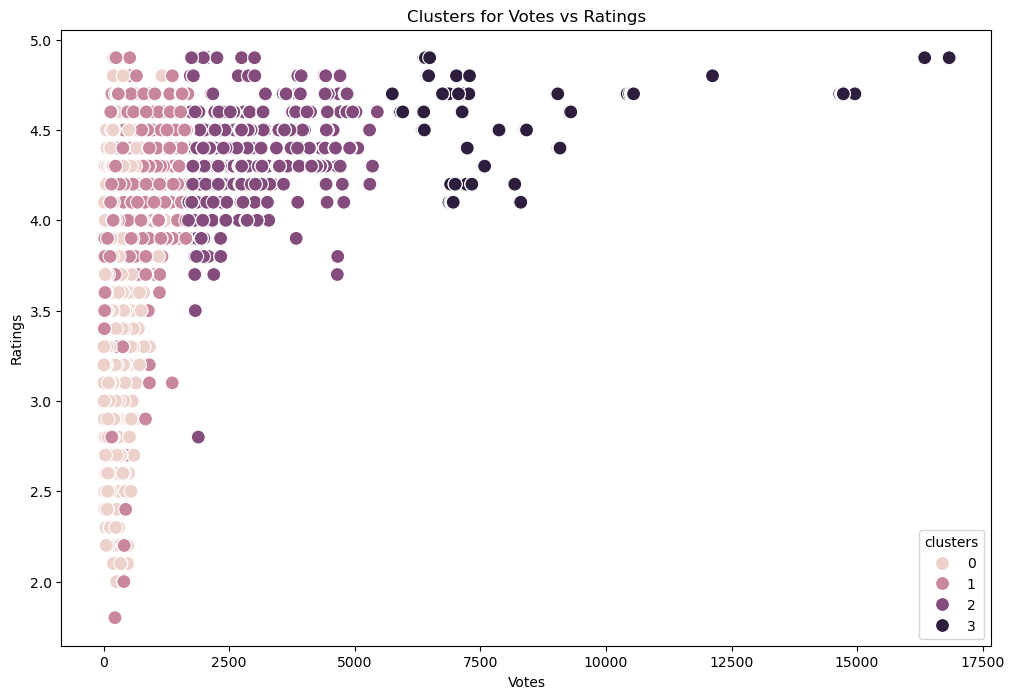

In [23]:
# Plot the clusters for the 'votes' and 'rate' variables
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    x=df_cleaned['votes'], 
    y=df_cleaned['rate'], 
    hue=df_cleaned['clusters'], 
    s=100
) 
# `x` and `y` represent the variables of interest. `hue` represents the cluster labels.
# `s` determines the size of the scatterplot points.

ax.grid(False)  # This removes the grid from the background.
plt.xlabel('Votes')  # Label x-axis.
plt.ylabel('Ratings')  # Label y-axis.
plt.title('Clusters for Votes vs Ratings')  # Add a title to the plot.
plt.show()

The clustering for Votes vs. Ratings generally makes sense, as it separates restaurants by popularity and quality. Cluster 0 (light pink) represents low-visibility restaurants with minimal votes and average ratings, while Cluster 1 (pink) includes moderately popular restaurants with good ratings. Clusters 2 and 3 (purple and dark purple) capture highly popular, well-rated restaurants, with Cluster 3 highlighting top-tier establishments with exceptionally high votes and ratings. A positive trend is observed, where higher votes correlate with better ratings. However, some overlap between Clusters 1 and 2 in mid-range votes suggests potential refinement. The dense concentration in Cluster 0 might indicate data imbalance. Adding features like cost or cuisine type and optimizing the clustering algorithm could improve segmentation. Outliers in Cluster 3 should also be explored to understand their unique success factors. Overall, the clusters provide logical insights but could benefit from further enhancement.

### Descriptive Statistics for the Clusters using the groupby() Function

In [24]:
# Renaming Clusters
df_cleaned.loc[df_cleaned['clusters'] == 3, 'clusters'] = 'dark purple'
df_cleaned.loc[df_cleaned['clusters'] == 2, 'clusters'] = 'purple'
df_cleaned.loc[df_cleaned['clusters'] == 1, 'clusters'] = 'pink'
df_cleaned.loc[df_cleaned['clusters'] == 0, 'clusters'] = 'light pink'

# Calculating descriptive statistics for each cluster
df_cleaned.groupby('clusters').agg({
    'rate': ['mean', 'median'],
    'votes': ['mean', 'median'],
    'approx_cost(for two people)': ['mean', 'median']
})

C:\Users\anush\AppData\Local\Temp\ipykernel_11272\3513344675.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'dark purple' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[df_cleaned['clusters'] == 3, 'clusters'] = 'dark purple'


rate               votes         approx_cost(for two people)  \
                 mean median         mean  median                        mean   
clusters                                                                        
dark purple  4.529557    4.5  8559.517241  7544.0                 1320.443350   
light pink   3.596107    3.6   112.101317    47.0                  432.893572   
pink         4.051671    4.1   638.859411   595.0                 1336.156136   
purple       4.316518    4.3  2747.219717  2435.0                 1175.039329   

                     
             median  
clusters             
dark purple  1400.0  
light pink    400.0  
pink         1200.0  
purple       1200.0

### Findings:
#### 1.	Dark Purple Cluster:
**Rate:** Highest mean and median (4.53 and 4.5), indicating top-rated restaurants.

**Votes:** Significantly high mean (8559.52) and median (7544), suggesting these restaurants are highly popular and have a strong customer base.

**Approximate Cost for Two People:** Relatively moderate mean (₹1320.44) and median (₹1400), showing these restaurants are mid-priced but highly preferred.

#### 2.	Purple Cluster:
**Rate:** Second highest mean (4.32) and median (4.3), indicating highly rated restaurants.

**Votes:** Moderate mean (2747.22) and median (2435), showing decent popularity.

**Approximate Cost for Two People:** Moderate mean (₹1175.04) and median (₹1200), highlighting these as premium but not overly expensive restaurants.

#### 3.	Pink Cluster:
**Rate:** Moderately high mean (4.05) and median (4.1), showing good ratings.

**Votes:** Mean (638.86) and median (595) reflect reasonable popularity.

**Approximate Cost for Two People:** Highest mean (₹1336.16) and median (₹1200), indicating these are moderately upscale restaurants with strong customer appeal.

#### 4.	Light Pink Cluster:
**Rate:** Lowest mean and median (3.60 and 3.6), indicating lower-rated restaurants.

**Votes:** Very low mean (112.10) and median (47), suggesting these are the least popular.

**Approximate Cost for Two People:** Lowest mean (₹432.89) and median (₹400), indicating budget-friendly, low-cost establishments.

### Insights:
* Restaurants in the dark purple cluster are ideal for targeting loyal customers, as they represent highly popular and top-rated establishments.

* Light pink cluster identifies low-cost, low-rated restaurants that may require targeted marketing or improvement efforts to enhance their ratings and popularity.

* Pink and purple clusters represent mid-to-high-tier restaurants, offering opportunities for targeted promotions or loyalty programs to strengthen customer retention.

### Future Steps in the Analytics Pipeline:
#### 1.	Targeted Marketing:
* We can use the dark purple and pink clusters to target frequent diners with premium offers or loyalty rewards.

* Focusing on marketing campaigns on the light pink cluster to improve visibility and address customer satisfaction issues.

#### 2.	Customer Segmentation:
* We can try to develop customer personas based on spending habits and rating preferences to personalize offerings for each cluster.

#### 3.	Operational Insights:
* For light pink restaurants, we can explore reasons for low votes and ratings, such as food quality, service, or location, and recommend actionable improvements.

#### 4.	Predictive Modeling:
* We can use the clustering insights to predict restaurant success or customer preferences based on cost, votes, and ratings.

#### 5.	Strategic Recommendations:
* Recommending pricing strategies to restaurants in the purple and pink clusters to enhance competitiveness without compromising quality.
These findings provide a solid foundation for actionable business strategies, including improving customer satisfaction, optimizing pricing models, and driving marketing efforts tailored to specific clusters.